In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


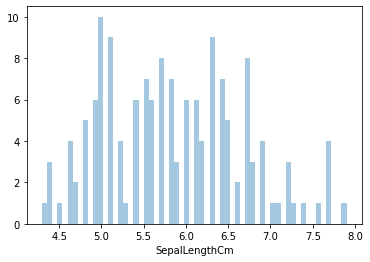

In [6]:
sns.distplot(df['SepalLengthCm'],kde=False,bins=60)

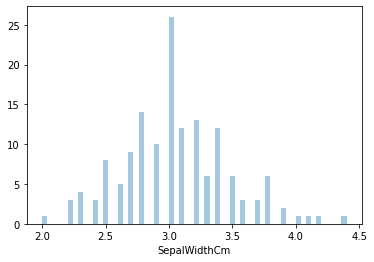

In [7]:
sns.distplot(df['SepalWidthCm'],kde=False,bins=60)

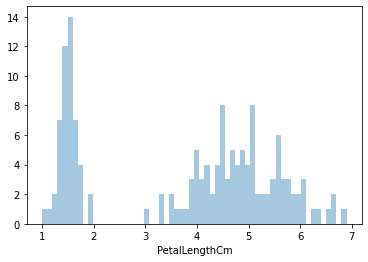

In [8]:
sns.distplot(df['PetalLengthCm'],kde=False,bins=60)

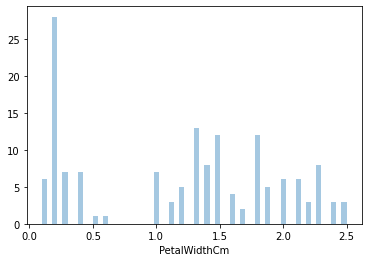

In [9]:
sns.distplot(df['PetalWidthCm'],kde=False,bins=60)

In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


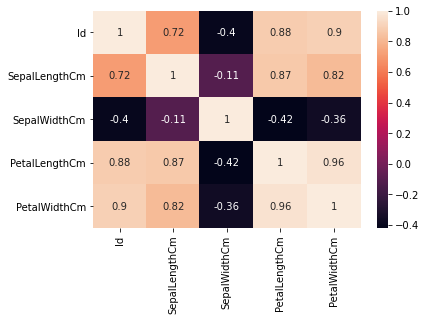

In [11]:
sns.heatmap(df.corr(),annot=True)

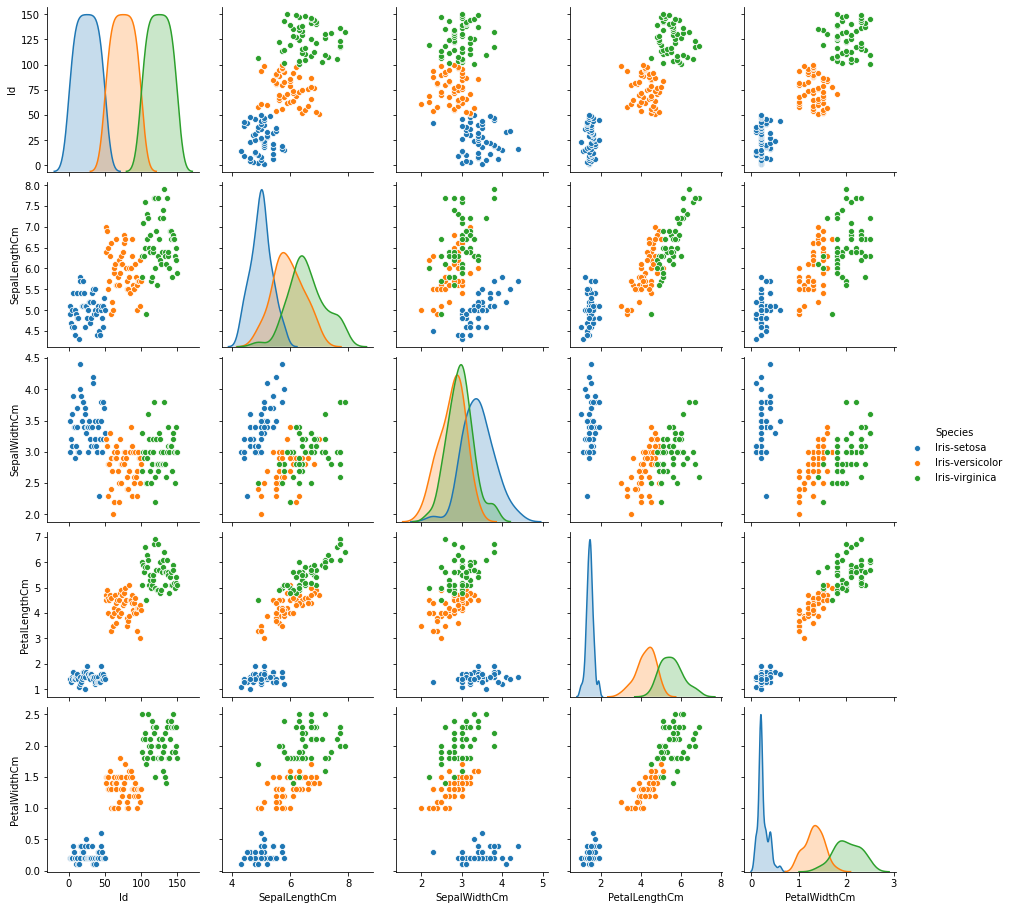

In [12]:
sns.pairplot(df,hue='Species')

In [13]:
y=df.Species
X=df.drop('Species',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model_1=LogisticRegression()

In [17]:
model_1.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
y_pred=model_1.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [20]:
from sklearn.model_selection import cross_val_score
model_1.score( X_test, y_test)

1.0

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [24]:
model_2 = Pipeline((
    ('scaler', StandardScaler()),
    ('linearsvc', LinearSVC(C=1, loss = 'hinge'))
))

In [26]:
model_2.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [27]:
y_pred_1 = model_2.predict(X_test)

In [28]:
confusion_matrix(y_test,y_pred_1)

array([[12,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 11]])

In [29]:
model_2.score( X_test, y_test)

0.9666666666666667

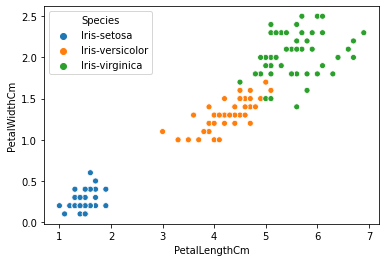

In [30]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue = df['Species'])

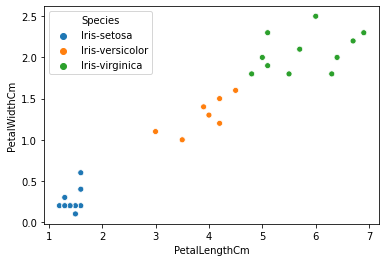

In [31]:
sns.scatterplot(X_test['PetalLengthCm'],X_test['PetalWidthCm'],hue = y_test)

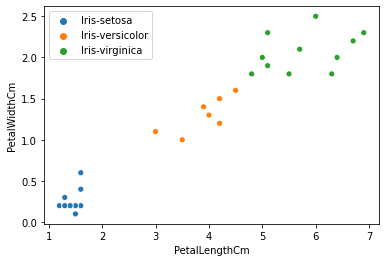

In [32]:
sns.scatterplot(X_test['PetalLengthCm'],X_test['PetalWidthCm'],hue = y_pred)

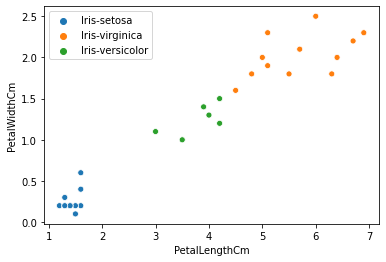

In [33]:
sns.scatterplot(X_test['PetalLengthCm'],X_test['PetalWidthCm'],hue = y_pred_1)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3)), ('scaler', StandardScaler()),
    ('linearsvc', LinearSVC(C=1, loss = 'hinge')) ))

In [39]:
model_3.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [40]:
y_pred_2 = model_3.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred_2)

array([[12,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 11]])

In [ ]:
sns.scatterplot(X_test['PetalLengthCm'],X_test['PetalWidthCm'],hue = y_pred_2)